# IMPORT LIBRARIES

## Import libraries

In [1]:
exec(open("auxiliary\\imports.py").read())
%matplotlib inline

def train_test(data,labels):    
    from sklearn.model_selection import train_test_split 
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

    return(X_train, X_test, y_train, y_test)

## Get MNIST

In [2]:
# load the digits dataset
# about 180 per class
num_classes = 10
digits = datasets.load_digits(n_class=num_classes)
digitsdata = digits.data
# print(digits.data)
color = digits.target

## PCA on MNIST


Cumulative Explained Variance


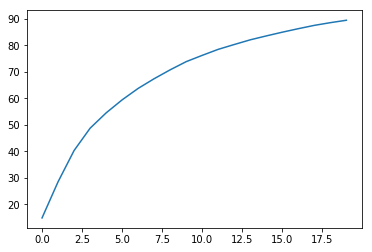

In [3]:
pca = PCA(n_components=20)

pca.fit(digitsdata)

#PRINT Explained Variance Ratio
# print('\n Explained Variance')
# print(pca.explained_variance_ratio_) 
# print('\nSingular Values')
# print(pca.singular_values_) 
print('\nCumulative Explained Variance')
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

# for i in range(64):
#     if var1[i] > 90:
#         components_needed = i
#         break
#     i += 1

# print(components_needed)
# reduced = pca.transform(images)

## KNN ON MNIST

In [4]:
X_train, X_test, y_train, y_test=train_test(digitsdata, color)

# training a KNN classifier
start=datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print("KNN Accuracy: " + str(accuracy*100)) 

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

end=datetime.datetime.now()
print("KNN Time Taken: " + str(end-start))

KNN Accuracy: 96.44444444444444
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  1  0  0  0]
 [ 1  0 41  0  0  0  0  1  1  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  4  0  1  0  0  1  1 41  0]
 [ 0  0  0  0  0  1  0  1  0 45]]
KNN Time Taken: 0:00:00.146609


## SVM on MNIST

In [5]:
start=datetime.datetime.now()
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print("SVM Accuracy: " + str(accuracy)) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)

end=datetime.datetime.now()
print("SVM Time Taken: " + str(end-start))

SVM Accuracy: 0.9711111111111111
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]
SVM Time Taken: 0:00:00.066819


## Reduce MNIST

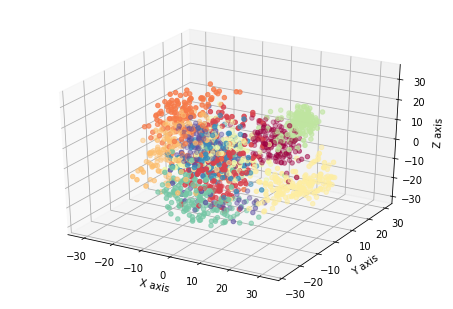

In [6]:
data_reduced = pca.transform(digitsdata)


fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], c = color, cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# print(data_reduced.shape)

## KNN on Reduced MNIST

In [7]:
X_train, X_test, y_train, y_test=train_test(data_reduced, color)

# training a KNN classifier
start=datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print("KNN Accuracy: " + str(accuracy*100)) 

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

end=datetime.datetime.now()
print("KNN Time Taken: " + str(end-start))

KNN Accuracy: 96.0
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 41  0  0  0  0  1  1  0]
 [ 0  0  1 42  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  4  0  1  0  0  1  1 41  0]
 [ 0  0  0  0  0  2  0  1  0 44]]
KNN Time Taken: 0:00:00.049868


## SVM on Reduced MNIST

In [8]:
start=datetime.datetime.now()
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print("SVM Accuracy: " + str(accuracy)) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)

end=datetime.datetime.now()
print("SVM Time Taken: " + str(end-start))

SVM Accuracy: 0.9688888888888889
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  2  1  0  0  1  0  0 44  0]
 [ 0  2  0  0  0  1  0  0  2 42]]
SVM Time Taken: 0:00:00.032928
